In [1]:
import time
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import numpy as np
from def_plotly import heatmap
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']='sans-serif'
from hunanu.Functions.function0 import savetxt


def phase_handle(Phase,f1,phase_delay):
    # phase_delay=67.86#62.03
    phase_offset=0
    phase_correct=np.zeros((Phase.shape[0],Phase.shape[1]))
    for i in range(len(f1)):
        phase_temp=Phase[:,i]+2*np.pi*f1[i]*phase_delay+phase_offset
        phase_correct[:,i]=np.angle(np.cos(phase_temp)+1j*np.sin(phase_temp))
    return phase_correct
def imshow(Amp,figname=None,Figsize=(10,8),extent=[0,1,0,1],xround='%0.0f',yround='%0.1f',xlabel=r'$\delta\Phi/\Phi_0\times10^3$',ylabel=r'Frequency (GHz)',cbarlabel=r"$|r|$",color='bwr',interpolations=None,vmax=None):
    if figname!=None:
        fig = plt.figure(figname,figsize=Figsize)
    else:
        fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
    if vmax==None:
        c=plt.imshow(Amp,aspect='auto',interpolation=interpolations,origin='upper',
                     extent=extent,
                    vmax=np.max(Amp), vmin=np.min(Amp))
    else:
        c=plt.imshow(Amp,aspect='auto',interpolation=interpolations,origin='upper',
             extent=extent,
            vmax=vmax, vmin=np.min(Amp))
    c.set_cmap(color)
#    c.set_cmap('jet')
    cbar = fig.colorbar(c)
    cbar.ax.tick_params(labelsize=18)
    cbar.set_label(cbarlabel,rotation='270',labelpad=20,fontsize=20)
    
    for tick in ax1.xaxis.get_major_ticks():
        tick.label.set_size(fontsize=20)
    for tick in ax1.yaxis.get_major_ticks():
        tick.label.set_size(fontsize=20)

#    ax1.xaxis.set_major_formatter(FormatStrFormatter(xround))
#    ax1.yaxis.set_major_formatter(FormatStrFormatter(yround))

    ax1.set_xlabel(xlabel,fontsize=24)
    ax1.set_ylabel(ylabel,fontsize=24)
    plt.pause(0.1)
    plt.show()
    return 
def plot22(f,Sdata21,Sdata43,Sdata41,Sdata23,name):
    fig=plt.figure('single',figsize=(8,8))
    ax1=fig.add_subplot(1,2,1);ax2=fig.add_subplot(1,2,2)
    plt.title(name)    
    ax1.plot(f[::-1],20*np.log10(np.abs(Sdata21)),label='S21',color='b',marker='+',markersize=2,linewidth=0.1)
    ax1.plot(f[::-1],20*np.log10(np.abs(Sdata43)),label='S43',color='g',marker='o',markersize=2,linewidth=0.1)
    ax1.legend(loc='upper right')
    
    ax2.plot(f[::-1],20*np.log10(np.abs(Sdata41)),label='S41',color='b',marker='+',markersize=2,linewidth=0.1)
    ax2.plot(f[::-1],20*np.log10(np.abs(Sdata23)),label='S23',color='g',marker='o',markersize=2,linewidth=0.1)
    ax2.legend(loc='upper right' )
    plt.pause(0.1)
    plt.show()
    return fig

In [5]:
from qunatify_utils.GS200 import YokogawaGS, gs_param_set
from qunatify_utils.KeysightMW import KeysightMWG, mw_param_set
from qunatify_utils.KeysightVNA import KeysightVNA, vna_param_set
from qunatify_utils.measurement_utils import batched_param
from qcodes import Station
from qcodes.instrument import find_or_create_instrument

import os

import quantify_core.data.handling as df
from quantify_core.measurement import MeasurementControl


df.set_datadir("./quantify-data/")
print("data folder: ", os.path.abspath(df.get_datadir()))

data folder:  /media/e/Data/LSY_new/quantify-data


In [6]:
# device initialization
vna = find_or_create_instrument(
    KeysightVNA,
    "VNA2", 
    "vna2", 
    trace="S43",
    metadata={
        "RT ATT": "60dB"
    }
)

mw = find_or_create_instrument(KeysightMWG, "MW1", "mw1")

gs_alpha = find_or_create_instrument(YokogawaGS, "GS_alpha", "DC1")
gs_local = find_or_create_instrument(YokogawaGS, "GS_local", "DC2")
gs_global = find_or_create_instrument(YokogawaGS, "GS_global", "DC4")



# define parameters
scan_points = 51
mwfreq_start = 3
mwfreq_stop = 7

# VNA initialization
vna_param_set(
    vna,
    fstart=6,
    fstop=8,
    ifband=30,
    points=scan_points,
    edelay=0e-9
)

# MW initialization
mw_param_set(
    mw,
    amp=-130,
    phase=0,
    freq=40,
)
gs_param_set(gs_global, "CURR", 'v2')
gs_param_set(gs_local, "CURR", 'v2')
gs_param_set(gs_alpha, "CURR", 'v2')

mw.mw.VnaTrig(mwfreq_start, mwfreq_stop, scan_points)


Connected to: Keysight Technologies N5232B (serial:MY57181300, firmware:A.13.20.12) in 104.92s
Connected to: Agilent Technologies E8257D (serial:MY58040387, firmware:C.06.26) in 104.22s
Connected to: YOKOGAWA GS210 (serial:91V111059, firmware:2.02) in 103.90s
Connected to: YOKOGAWA GS210 (serial:91V111057, firmware:2.02) in 103.59s
Connected to: YOKOGAWA GS210 (serial:91V111055, firmware:2.02) in 103.28s


AttributeError: 'KeysightMWG' object and its delegates have no attribute 'amplitude'

In [10]:
gs_param_set(gs_global, "CURR", 'v2')
gs_param_set(gs_local, "CURR", 'v2')
gs_param_set(gs_alpha, "CURR", 'v2')

mw.mw.VnaTrig(mwfreq_start, mwfreq_stop, scan_points)

In [13]:
bg = vna.data_S43()

alpha_curr = 0
z_curr = -2.04
gs_alpha.level([alpha_curr, 0.005])
gs_local.level([z_curr, 0.005])

mw.rf_output("on")

meas_ctrl = find_or_create_instrument(MeasurementControl, "twotone-sweep-global")


global_volt = np.array([-0.74])
global_set_speed = 1e-4
global_setpoints = np.hstack([global_volt.reshape((-1, 1)), np.full((len(global_volt), 1), global_set_speed)])

local_volt = np.array([-2.04, 2.0])
local_set_speed = 5e-3
local_setpoints = np.hstack([local_volt.reshape((-1, 1)), np.full((len(local_volt), 1), local_set_speed)])

alpha_volt = np.array([0])
alpha_set_speed = 5e-3
alpha_setpoints = np.hstack([alpha_volt.reshape((-1, 1)), np.full((len(alpha_volt), 1), alpha_set_speed)])

mw_power_list = np.array([-30])



meas_ctrl.settables([gs_global.level, gs_local.level, gs_alpha.level, mw.power])
meas_ctrl.setpoints_grid([global_setpoints, local_setpoints, alpha_setpoints, mw_power_list])
meas_ctrl.gettables(batched_param(vna.data_S43, scan_points))

dset = meas_ctrl.run(f"twotone-alpha={alpha_curr}-z={z_curr}")





0
0


KeyError: 'Another instrument has the name: twotone_sweep_global'

:Layout
   .Image.I :Image   [x,y]   (z)
   .Div.I   :Div
   .Div.II  :Div
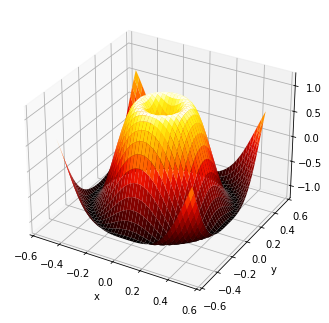

In [20]:
import hvplot.pandas
import numpy as np
import pandas
# from IPython.display import display
import holoviews as hv

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
img = hv.Image(Z)

# Render matplotlib surface plot to HTML
surface = hv.Surface(img)
surface_html = hv.renderer('matplotlib').html(surface)
surface_div = hv.Div(surface_html)

# Generate HTML summary table from pandas dataframe
df_html = img.dframe()[['z']].describe().to_html()
df_div = hv.Div("<div align='right'>"+df_html+"<div>")

img + surface_div + df_div.opts(width=200)

In [ ]:
{
    "RTatt": 60,
    "mwpower": "-130dB",
    ...
}